In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro, levene, mannwhitneyu

# 데이터 확인

In [12]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# Step 1: 실험 목표 정의

- 목표: 새로운 웹페이지 디자인(new_page)이 기존 웹페이지(old_page)보다 더 높은 전환율(converted)을 달성하는지 확인한다.
- 성과 지표: 전환율(Conversion Rate), 즉 특정 행동(예: 구매, 회원가입)을 완료한 사용자의 비율.
- 성과 기준: 새로운 웹페이지의 전환율이 기존 페이지보다 통계적으로 유의미하게 높아야 한다.

# Sept 2: 그룹 이해

- 그룹: Control 그룹, Treatment 그룹
- Control 그룹: 기존 웹페이지(old_page)를 본 사용자
- Treatment 그룹: 새롭게 디자인된 웹페이지(new_page)를 본 사용자

# Sept 3: 공식 가설
- 가설 1: 두 그룹간의 전환율에 차이가 없다.
- 가설 2: 새로운 웹페이지의 전환율이 기존 웹페이지의 전환율 보다 높다. 

# Sept 4: 지표 분석

In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# old_page(=Control 그룹) 필터링
control_group = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]

# Control 그룹의 전환율 계산
control_conversion_rate = control_group['converted'].mean()

print(f"Control 그룹의 전환율 (old_page): {control_conversion_rate:.2%}")


Control 그룹의 전환율 (old_page): 12.04%


In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# control 그룹의 new_page 필터링
control_new_page_group = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# control 그룹의 new_page 전환율 계산
control_new_page_conversion_rate = control_new_page_group['converted'].mean()

print(f"Control 그룹의 전환율 (new_page): {control_new_page_conversion_rate:.2%}")


Control 그룹의 전환율 (new_page): 12.14%


In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# new_page(=Treatment 그룹) 필터링
treatment_group = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

# Treatment 그룹의 전환율 계산
treatment_conversion_rate = treatment_group['converted'].mean()

print(f"Treatment 그룹의 전환율 (new_page): {treatment_conversion_rate:.2%}")


Treatment 그룹의 전환율 (new_page): 11.88%


In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# Treatment 그룹의 old_page 필터링
treatment_old_page_group = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

# Treatment 그룹의 old_page 전환율 계산
treatment_old_page_conversion_rate = treatment_old_page_group['converted'].mean()

print(f"Treatment 그룹의 전환율 (old_page): {treatment_old_page_conversion_rate:.2%}")


Treatment 그룹의 전환율 (old_page): 12.72%


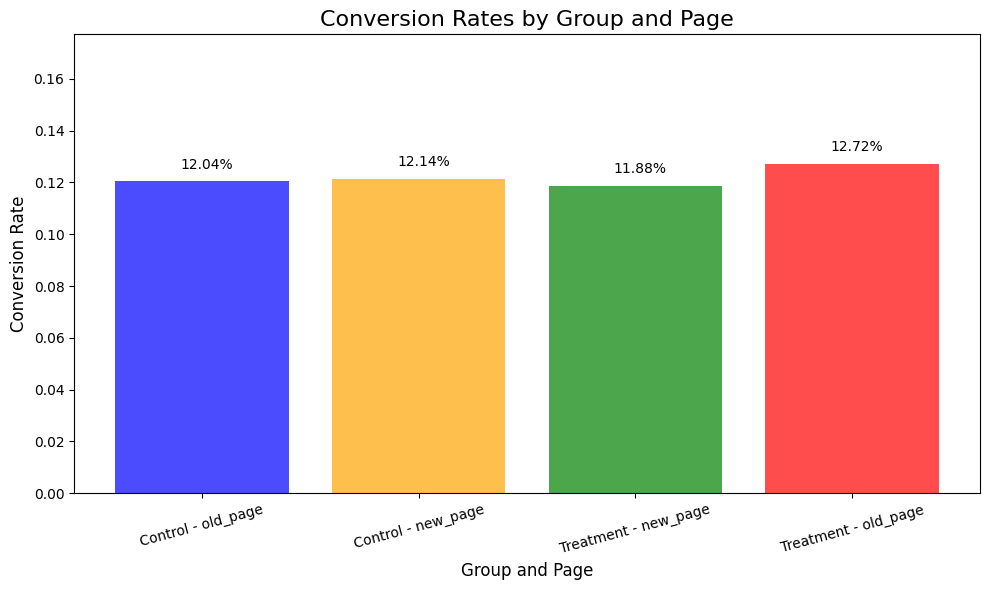

In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# 각 그룹 필터링 및 전환율 계산
control_old_page = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]['converted'].mean()
control_new_page = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]['converted'].mean()
treatment_new_page = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]['converted'].mean()
treatment_old_page = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]['converted'].mean()

# 전환율 데이터
conversion_rates = {
    "Control - old_page": control_old_page,
    "Control - new_page": control_new_page,
    "Treatment - new_page": treatment_new_page,
    "Treatment - old_page": treatment_old_page,
}

# 데이터 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(conversion_rates.keys(), conversion_rates.values(), color=['blue', 'orange', 'green', 'red'], alpha=0.7)

# 그래프 세부 설정
plt.title('Conversion Rates by Group and Page', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Group and Page', fontsize=12)
plt.ylim(0, max(conversion_rates.values()) + 0.05)  # Y축 여유 추가
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

# 막대 위에 전환율 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1,
             bar.get_height() + 0.005,
             f"{bar.get_height():.2%}",
             fontsize=10)

# 그래프 출력
plt.tight_layout()
plt.show()


# Sept 5: 통계 테스트

In [ ]:
# 데이터 불러오기
df = pd.read_csv("ab_data.csv")

# 그룹별 사용자 수 및 전환된 사용자 수 계산
control_old = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
control_new = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
treatment_new = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
treatment_old = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

# 그룹별 총 사용자 수
n_control_old = control_old.shape[0]
n_control_new = control_new.shape[0]
n_treatment_new = treatment_new.shape[0]
n_treatment_old = treatment_old.shape[0]

# 그룹별 전환된 사용자 수
success_control_old = control_old['converted'].sum()
success_control_new = control_new['converted'].sum()
success_treatment_new = treatment_new['converted'].sum()
success_treatment_old = treatment_old['converted'].sum()

# 두 그룹 비교 (예: Control - old_page vs Treatment - new_page)
success = [success_control_old, success_treatment_new]
nobs = [n_control_old, n_treatment_new]

# Z-검정
z_stat, p_value = proportions_ztest(success, nobs)

print("=== 그룹별 정보 ===")
print(f"Control - old_page 사용자 수: {n_control_old}, 전환된 사용자 수: {success_control_old}")
print(f"Control - new_page 사용자 수: {n_control_new}, 전환된 사용자 수: {success_control_new}")
print(f"Treatment - new_page 사용자 수: {n_treatment_new}, 전환된 사용자 수: {success_treatment_new}")
print(f"Treatment - old_page 사용자 수: {n_treatment_old}, 전환된 사용자 수: {success_treatment_old}")

print("\n=== Z 검정 결과 ===")
print(f"Z-통계량: {z_stat:.4f}")
print(f"P-값: {p_value:.4f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("P-값이 유의 수준보다 작으므로, 두 그룹의 전환율 차이는 통계적으로 유의합니다.")
else:
    print("P-값이 유의 수준보다 크므로, 두 그룹의 전환율 차이는 통계적으로 유의하지 않습니다.")


=== 그룹별 정보 ===
Control - old_page 사용자 수: 145274, 전환된 사용자 수: 17489
Control - new_page 사용자 수: 1928, 전환된 사용자 수: 234
Treatment - new_page 사용자 수: 145313, 전환된 사용자 수: 17264
Treatment - old_page 사용자 수: 1965, 전환된 사용자 수: 250

=== Z 검정 결과 ===
Z-통계량: 1.3130
P-값: 0.1892
P-값이 유의 수준보다 크므로, 두 그룹의 전환율 차이는 통계적으로 유의하지 않습니다.
